# 目次

1. データ分析エンジニアの役割（読むだけ）
   1. データ分析の世界
   2. 機械学習の位置づけと流れ
   3. データ分析に使う主なパッケージ
2. Pythonと環境（読むだけ）
   1. 実行環境構築
   2. Pythonの基礎
   3. Jupyter Notebook
3. 数学の基礎（読むだけ）
   1. 数式を読むための基礎知識
   2. 線形代数
   3. 基礎解析
   4. 確率と統計
4. ライブラリによる分析の実践（実装する）
   1. Numpy
   2. pandas
   3. Matplotlib
   4. scikit-learn
5. 応用：データ収集と加工（実装する）
   1. スクレイピング
   2. 自然言語の処理
   3. 画像データの処理

In [1]:
# textbooks sample files directory
notebooks_dir = './notebooks'
data_dir = notebooks_dir + '/data'
# ** tips: Jupyter Notebook でグラフを表示する
import matplotlib.pyplot as plt
%matplotlib inline

## 4. ライブラリによる分析の実践

### 4.1. Numpy

In [2]:
# import
import numpy as np

# make array
a_1d = np.array([1, 2, 3, 4, 5, 6])
a_2d = np.array([[1, 2, 3], [4, 5, 6]])
a_1d_reshaped_to_2d = a_1d.reshape((2, 3))

In [3]:
print(a_1d)
print()
print(a_2d)
print()
print(a_1d_reshaped_to_2d)

[1 2 3 4 5 6]

[[1 2 3]
 [4 5 6]]

[[1 2 3]
 [4 5 6]]


In [4]:
a_2d_raveled_to_1d = a_1d_reshaped_to_2d.ravel()
a_2d_raveled_to_1d # 参照を返す

array([1, 2, 3, 4, 5, 6])

In [5]:
a_2d_flatten_to_1d = a_1d_reshaped_to_2d.flatten()
a_2d_flatten_to_1d # コピーを返す

array([1, 2, 3, 4, 5, 6])

In [6]:
# 数列を返す
# np.arange(size)
print(np.arange(10))
# np.arange(start, end) generated number < end
print(np.arange(1, 11))
# np.arange(start, end, step)
print(np.arange(1, 11, 2))

[0 1 2 3 4 5 6 7 8 9]
[ 1  2  3  4  5  6  7  8  9 10]
[1 3 5 7 9]


In [7]:
# random
f1 = np.random.randint(1, 1000)
f2 = np.random.randint(1, 1000)
print(f1)
print(f2)
# 練習ではシード値を固定（結果を同じ）にすることが多い
# 結果が同じとは、何度試行（複数回呼び出し）しても同じ値になるということである
# 実際はシード値を固定にしない
np.random.seed(123)
f1 = np.random.randint(1, 100)
f2 = np.random.randint(1, 100)
print(f1)
print(f2)

896
433
67
93


In [8]:
# method
# - zeros: 全てゼロ
print(np.zeros((3, 3)), '\n')
# - ones: 全て1
print(np.ones((3, 3)), '\n')
# - eye: 単位行列
print(np.eye(3), '\n')
# - full: 指定の値で埋める
print(np.full((3, 3), 3.14), '\n')
# - linspace: 線形補間 (start, end, split num)
print(np.linspace(0, 1, 5), '\n')
# - diff: 要素間の差分数列を返す
print('a: ', np.array([0, 1, 3, 7, 2]))
print('a.diff: ', np.diff(np.array([0, 1, 3, 7, 2])))

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]] 

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] 

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 

[[3.14 3.14 3.14]
 [3.14 3.14 3.14]
 [3.14 3.14 3.14]] 

[0.   0.25 0.5  0.75 1.  ] 

a:  [0 1 3 7 2]
a.diff:  [ 1  2  4 -5]


In [9]:
# 行列の連結
# 行方向
# np.concatnate([a, b], axis=0)
# np.vstack([a, b])
# 列方向
# np.concatnate([a, b], axis=1)
# np.hstack([a, b])
# ----------------------
a = np.arange(1, 10, 1).reshape((3, 3))
b = np.arange(11, 20, 1).reshape((3, 3))
# ----------------------
ab_vertical_concat = np.concatenate([a, b], axis=0)
print('concat vertical >>')
print(ab_vertical_concat)
ab_vertical_vstack = np.vstack([a, b])
print('vstack vertical >>')
print(ab_vertical_vstack)
# ----------------------
ab_horizontal_concat = np.concatenate([a, b], axis=1)
print('concat horizontal >>')
print(ab_horizontal_concat)
ab_horizontal_hstack = np.hstack([a, b])
print('hstack horizontal >>')
print(ab_horizontal_hstack)

concat vertical >>
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [11 12 13]
 [14 15 16]
 [17 18 19]]
vstack vertical >>
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [11 12 13]
 [14 15 16]
 [17 18 19]]
concat horizontal >>
[[ 1  2  3 11 12 13]
 [ 4  5  6 14 15 16]
 [ 7  8  9 17 18 19]]
hstack horizontal >>
[[ 1  2  3 11 12 13]
 [ 4  5  6 14 15 16]
 [ 7  8  9 17 18 19]]


In [10]:
# 行列の分割
# 行方向の分割：vsplit(src, [n]) > n行分が一つ目の戻り値、二つ目は残りの行
first, second = np.vsplit(a, [2])
print('vsplit a > 2row, else >>')
print(first)
print(second)
# 列方向の分割：hsplit(src, [n]) > n列分が一つ目の戻り値、二つ目は残りの列
first, second = np.hsplit(a, [2])
print('hsplit a > 2clm, else >>')
print(first)
print(second)

vsplit a > 2row, else >>
[[1 2 3]
 [4 5 6]]
[[7 8 9]]
hsplit a > 2clm, else >>
[[1 2]
 [4 5]
 [7 8]]
[[3]
 [6]
 [9]]


In [11]:
# 転置
print('a is >>')
print(a)
print()
print('transposed a (= a.T) is >>')
print(a.T)

a is >>
[[1 2 3]
 [4 5 6]
 [7 8 9]]

transposed a (= a.T) is >>
[[1 4 7]
 [2 5 8]
 [3 6 9]]


In [12]:
# 次元の追加
# 増やしたい方向（row or col）にnp.newaxisを指定してスライシングする
# 行方向の次元を増やしたい
print('add dim in row >> ')
print(a)
print(a[np.newaxis, :])
# 列方向の次元を増やしたい
print('add dim in col >> ')
print(a)
print(a[:, np.newaxis])

add dim in row >> 
[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[[1 2 3]
  [4 5 6]
  [7 8 9]]]
add dim in col >> 
[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[[1 2 3]]

 [[4 5 6]]

 [[7 8 9]]]


In [13]:
# グリッドデータの作成（3Dグラフを作る時とか使うこと多い）
# > meshgridが作るものは何？
# > - X座標列とY座標列から、それらを組み合わせて出来る全ての座標データを生成する
# > - x = (1, 2, 3), y = (1, 2, 3) を入力とすると
# > - [(1, 1), (2, 1), ... , (2, 3), (3, 3)] を作る
# > - 具体的な出力は上記のX座標値とY座標値が別々で出るイメージ
# > - x_grid = [1, 2, 3, 1, 2, 3, 1, ...]
# > - y_grid = [1, 1, 1, 2, 2, 2, 3, ...]
m = np.arange(0, 4)
n = np.arange(4, 7)
x_grid, y_grid = np.meshgrid(m, n)

In [14]:
print('m: {0}\nn: {1}'.format(m, n))
print(' === x_grid === ')
print(x_grid)
print(' === y_grid === ')
print(y_grid)

m: [0 1 2 3]
n: [4 5 6]
 === x_grid === 
[[0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]]
 === y_grid === 
[[4 4 4 4]
 [5 5 5 5]
 [6 6 6 6]]


In [15]:
# ===============================================================
# Universal Function
# Numpyの強力な機能の一つ。全要素に対する様々な一括処理メソッド
# 中身はCなので高速
# 1. np.abs(arr) * 試しに処理時間を計算する
# 2. np.sin(arr)
# 3. np.cos(arr)
# 4. np.log(arr) <-- ln
# 5. np.log10(arr)
# 6. np.exp(arr) ... etc
# *** timer cell: https://qiita.com/mgsk_2/items/437656b8ce42c03e41a6
sample_arr = np.arange(-50000, 70000).reshape((300, 400))
sample_arr

array([[-50000, -49999, -49998, ..., -49603, -49602, -49601],
       [-49600, -49599, -49598, ..., -49203, -49202, -49201],
       [-49200, -49199, -49198, ..., -48803, -48802, -48801],
       ...,
       [ 68800,  68801,  68802, ...,  69197,  69198,  69199],
       [ 69200,  69201,  69202, ...,  69597,  69598,  69599],
       [ 69600,  69601,  69602, ...,  69997,  69998,  69999]])

In [16]:
%%timeit
sample_2dlist = sample_arr.tolist()
absoluted = []
for i, values in enumerate(sample_2dlist):
    absoluted.append([])
    for val in values:
        absoluted[i].append(abs(val))
absoluted

31.7 ms ± 1.64 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [17]:
%%timeit
np.abs(sample_arr)

92.5 µs ± 1.24 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [18]:
# ===============================================================
# Broadcast
# Numpyの強力な機能の一つ。四則演算の算術演算子を記述するだけで
# 高速に全要素に対して、要素ごとに算術演算を実行する
# +, -, /, *, **

In [19]:
%%timeit
sample_2dlist = sample_arr.tolist()
added3 = []
for i, values in enumerate(sample_2dlist):
    added3.append([])
    for val in values:
        
        added3[i].append(val + 3)
added3

28.2 ms ± 1.16 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [20]:
%%timeit
sample_arr + 3

53.3 µs ± 1.71 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [21]:
#========================================
# dot product
# 行列の積（内積）
# 以前は、np.dot(b, a)
# Python3.5以降は、b @ a
a = np.arange(1, 10).reshape((3, 3))
b = np.arange(11, 20).reshape((3, 3))
c = b @ a
print('a = \n', a)
print('b = \n', b)
print('c = \n', c)

a = 
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
b = 
 [[11 12 13]
 [14 15 16]
 [17 18 19]]
c = 
 [[150 186 222]
 [186 231 276]
 [222 276 330]]


In [22]:
# =====================================
# 判定・論理値
# a < b >> [True, False, True] みたいな行列を返す
# これを応用して、「ある条件を満たす要素のみ取得/カウントする」などが良く使われる
# - 正の要素数を取得する
# Case1 np.sum()＋論理値行列＝条件を満たす要素の数を取得する
nonzero_num = np.count_nonzero(sample_arr > 0)
true_num = np.sum(sample_arr > 0)
print('nonzero num : ', nonzero_num, '\ntrue_num : ', true_num)
# Case2 np.any()＋論理値行列＝条件を満たす要素が少なくとも一つあるかどうか判定する
plus_exists = np.any(sample_arr > 0)
print('plus element exists ? : ', plus_exists)
# Case3 np.allclose()＝二つの行列の全要素間の差が規定の誤差以内か？（近似）
sample_arr = sample_arr.astype(float)
sample_arr_ = sample_arr + 0.001
close_001 = np.allclose(sample_arr, sample_arr_, atol=0.01)
close_00001 = np.allclose(sample_arr, sample_arr_, atol=0.0001)
print('sample_arr is all close to sample_arr_?(delta<0.01)', close_001)
print('sample_arr is all close to sample_arr_?(delta<0.0001)', close_00001)

nonzero num :  69999 
true_num :  69999
plus element exists ? :  True
sample_arr is all close to sample_arr_?(delta<0.01) True
sample_arr is all close to sample_arr_?(delta<0.0001) False


### 4.2. pandas

In [23]:
import pandas as pd
df = pd.DataFrame(np.arange(12).reshape((4, 3)), columns=['A', 'B', 'C'], index=['1', '2', '3', '4'])
df

,A,B,C
1,0,1,2
2,3,4,5
3,6,7,8
4,9,10,11


In [24]:
# 様々な抽出
# スライシングとloc, ilocメソッド
# 1. カラム名を指定する
print('df[\'A\'] = \n{0}'.format(df['A']))
print('df[[\'A\', \'B\']] = \n{0}'.format(df[['A', 'B']]))
# 2. 行を指定する
print('df[:2] = \n{0}'.format(df[:2]))
print('df[2:4] = \n{0}'.format(df[2:4]))
# 3. locメソッド ==> 「index名とcolumn名」
print('df.loc[:,[\'A\', \'B\']] = \n{0}'.format(df.loc[:,['A', 'B']]))
print('df.loc[[\'2\', \'3\', \'4\'],[\'A\', \'B\']] = \n{0}'.format(df.loc[['2', '3', '4'],['A', 'B']]))
# 4. ilocメソッド ==> 「index番号とcolumn番号」番号は0始まり, (*index location)
print('df.iloc[:,[0, 1]] = \n{0}'.format(df.iloc[:,[0, 1]]))
print('df.iloc[[1, 2, 3],[0, 1]] = \n{0}'.format(df.iloc[[1, 2, 3],[0, 1]]))
print('df.iloc[2:,[0, 1]] = \n{0}'.format(df.iloc[2:,[0, 1]]))

df['A'] = 
1    0
2    3
3    6
4    9
Name: A, dtype: int64
df[['A', 'B']] = 
   A   B
1  0   1
2  3   4
3  6   7
4  9  10
df[:2] = 
   A  B  C
1  0  1  2
2  3  4  5
df[2:4] = 
   A   B   C
3  6   7   8
4  9  10  11
df.loc[:,['A', 'B']] = 
   A   B
1  0   1
2  3   4
3  6   7
4  9  10
df.loc[['2', '3', '4'],['A', 'B']] = 
   A   B
2  3   4
3  6   7
4  9  10
df.iloc[:,[0, 1]] = 
   A   B
1  0   1
2  3   4
3  6   7
4  9  10
df.iloc[[1, 2, 3],[0, 1]] = 
   A   B
2  3   4
3  6   7
4  9  10
df.iloc[2:,[0, 1]] = 
   A   B
3  6   7
4  9  10


In [25]:
# FILE IO
# 1. read csv
df = pd.read_csv(data_dir + '/201704health.csv', encoding='utf-8')
print('csv df')
print(df.head(10))
# 2. read excel
df = pd.read_excel(data_dir + '/201704health.xlsx')
print('excel df')
print(df.head(10))
# 3. read html table (webページのtable要素を読み込む)
url = 'https://ja.wikipedia.org/wiki/%E3%83%97%E3%83%AD%E3%82%B0%E3%83%A9%E3%83%9F%E3%83%B3%E3%82%B0%E8%A8%80%E8%AA%9E'
tables = pd.read_html(url)
df = tables[2]
print('html table df')
print(df)
# 4. to csv
# 5. to excel
# 6. pickle (to pickle, read pickle)
#   > python標準のオブジェクト格納用バイナリファイル
#   > read_pickle(), to_pickle() で実行する

csv df
           日付     歩数  摂取カロリー
0  2017-04-01   5439    2500
1  2017-04-02   2510    2300
2  2017-04-03  10238    1950
3  2017-04-04   8209    1850
4  2017-04-05   9434    1930
5  2017-04-06   7593    1800
6  2017-04-07   9320    1940
7  2017-04-08   4873    2300
8  2017-04-09  12045    1950
9  2017-04-10   7493    1850
excel df
           日付     歩数  摂取カロリー
0  2017-04-01   5439    2500
1  2017-04-02   2510    2300
2  2017-04-03  10238    1950
3  2017-04-04   8209    1850
4  2017-04-05   9434    1930
5  2017-04-06   7593    1800
6  2017-04-07   9320    1940
7  2017-04-08   4873    2300
8  2017-04-09  12045    1950
9  2017-04-10   7493    1850
html table df
                                                    0  \
0   表話編歴コンピュータ・プログラミング言語低水準言語 機械語 アセンブリ言語 高水準言語 19...   
1                                表話編歴コンピュータ・プログラミング言語   
2                                               低水準言語   
3                                               高水準言語   
4                                              

In [26]:
# =======================================
# Data Arrangement データの整形
# =======================================

In [27]:
df = pd.read_excel(data_dir + '/201704health.xlsx')
df

,日付,歩数,摂取カロリー
0,2017-04-01,5439,2500
1,2017-04-02,2510,2300
2,2017-04-03,10238,1950
3,2017-04-04,8209,1850
4,2017-04-05,9434,1930
5,2017-04-06,7593,1800
6,2017-04-07,9320,1940
7,2017-04-08,4873,2300
8,2017-04-09,12045,1950
9,2017-04-10,7493,1850


In [28]:
# 歩数が10000以上の日だけ抽出
# 論理演算子をシンプルに使う方法
df_selected = df[df['歩数'] >= 10000]
df_selected

,日付,歩数,摂取カロリー
2,2017-04-03,10238,1950
8,2017-04-09,12045,1950
12,2017-04-13,10287,1800
19,2017-04-20,15328,1800
20,2017-04-21,12849,1940


In [29]:
# queryメソッドを使う方法 (個人的にはこちらの方が好き) 変数を使う場合は@をつける
df_selected = df.query('歩数 >= 10000')
df_selected

,日付,歩数,摂取カロリー
2,2017-04-03,10238,1950
8,2017-04-09,12045,1950
12,2017-04-13,10287,1800
19,2017-04-20,15328,1800
20,2017-04-21,12849,1940


In [30]:
thresh = 10000
df_selected = df.query('歩数 >= @thresh')
df_selected

,日付,歩数,摂取カロリー
2,2017-04-03,10238,1950
8,2017-04-09,12045,1950
12,2017-04-13,10287,1800
19,2017-04-20,15328,1800
20,2017-04-21,12849,1940


In [31]:
# 型を確認
df.dtypes

日付        object
歩数         int64
摂取カロリー     int64
dtype: object

In [32]:
# 日付がobjectになっている。datetime型にする
df['date'] = df['日付'].apply(pd.to_datetime)  # apply(func) コールバック関数を実行
df

,日付,歩数,摂取カロリー,date
0,2017-04-01,5439,2500,2017-04-01
1,2017-04-02,2510,2300,2017-04-02
2,2017-04-03,10238,1950,2017-04-03
3,2017-04-04,8209,1850,2017-04-04
4,2017-04-05,9434,1930,2017-04-05
5,2017-04-06,7593,1800,2017-04-06
6,2017-04-07,9320,1940,2017-04-07
7,2017-04-08,4873,2300,2017-04-08
8,2017-04-09,12045,1950,2017-04-09
9,2017-04-10,7493,1850,2017-04-10


In [33]:
# データ型を再度確認
df.dtypes

日付                object
歩数                 int64
摂取カロリー             int64
date      datetime64[ns]
dtype: object

In [34]:
# 摂取カロリーをfloat型にする
df['摂取カロリー'] = df['摂取カロリー'].astype(np.float32)
df

,日付,歩数,摂取カロリー,date
0,2017-04-01,5439,2500.0,2017-04-01
1,2017-04-02,2510,2300.0,2017-04-02
2,2017-04-03,10238,1950.0,2017-04-03
3,2017-04-04,8209,1850.0,2017-04-04
4,2017-04-05,9434,1930.0,2017-04-05
5,2017-04-06,7593,1800.0,2017-04-06
6,2017-04-07,9320,1940.0,2017-04-07
7,2017-04-08,4873,2300.0,2017-04-08
8,2017-04-09,12045,1950.0,2017-04-09
9,2017-04-10,7493,1850.0,2017-04-10


In [35]:
# dateをindexとして設定
df = df.set_index('date')
df.head()

,日付,歩数,摂取カロリー
date,,,
2017-04-01,2017-04-01,5439,2500.0
2017-04-02,2017-04-02,2510,2300.0
2017-04-03,2017-04-03,10238,1950.0
2017-04-04,2017-04-04,8209,1850.0
2017-04-05,2017-04-05,9434,1930.0


In [36]:
# 歩数でソート
df.sort_values(by='歩数')

,日付,歩数,摂取カロリー
date,,,
2017-04-02,2017-04-02,2510,2300.0
2017-04-23,2017-04-23,3890,1950.0
2017-04-22,2017-04-22,4029,2300.0
2017-04-30,2017-04-30,4093,1950.0
2017-04-08,2017-04-08,4873,2300.0
2017-04-01,2017-04-01,5439,2500.0
2017-04-29,2017-04-29,6033,2300.0
2017-04-12,2017-04-12,6481,2300.0
2017-04-27,2017-04-27,7203,1930.0


In [37]:
# 不要なカラムの削除
df = df.drop('日付', axis=1)
df

,歩数,摂取カロリー
date,,
2017-04-01,5439,2500.0
2017-04-02,2510,2300.0
2017-04-03,10238,1950.0
2017-04-04,8209,1850.0
2017-04-05,9434,1930.0
2017-04-06,7593,1800.0
2017-04-07,9320,1940.0
2017-04-08,4873,2300.0
2017-04-09,12045,1950.0


In [38]:
# 組み合わせデータの挿入
# 新たに 歩数/カロリー を計算し、カラムを追加する
df['歩数 / カロリー'] = df['歩数'] / df['摂取カロリー']
df

,歩数,摂取カロリー,歩数 / カロリー
date,,,
2017-04-01,5439,2500.0,2.175600
2017-04-02,2510,2300.0,1.091304
2017-04-03,10238,1950.0,5.250256
2017-04-04,8209,1850.0,4.437297
2017-04-05,9434,1930.0,4.888083
2017-04-06,7593,1800.0,4.218333
2017-04-07,9320,1940.0,4.804124
2017-04-08,4873,2300.0,2.118696
2017-04-09,12045,1950.0,6.176923


In [39]:
# 歩数/カロリー の値を3つに分類する 運動指数 カラムを作る
# 運動指数計算関数
def exercise_judge(ex: float):
    if ex <= 3.0:
        return 'Low'
    elif 3.0 < ex <= 6.0:
        return 'Mid'
    else:
        return 'High'
# applyメソッドで全要素に対して一括実行
df['運動指数'] = df['歩数 / カロリー'].apply(exercise_judge)
df

,歩数,摂取カロリー,歩数 / カロリー,運動指数
date,,,,
2017-04-01,5439,2500.0,2.175600,Low
2017-04-02,2510,2300.0,1.091304,Low
2017-04-03,10238,1950.0,5.250256,Mid
2017-04-04,8209,1850.0,4.437297,Mid
2017-04-05,9434,1930.0,4.888083,Mid
2017-04-06,7593,1800.0,4.218333,Mid
2017-04-07,9320,1940.0,4.804124,Mid
2017-04-08,4873,2300.0,2.118696,Low
2017-04-09,12045,1950.0,6.176923,High


In [40]:
# この情報を一旦保存
path_df_shaped_pickle = data_dir + '/df_shaped_201704health.pickle'
df.to_pickle(path_df_shaped_pickle)

In [41]:
# One-hot encoding する
# 日付ごとに運動指数のOne-hotベクターを作る
df_moved = pd.get_dummies(df['運動指数'], prefix='運動')
df_moved

,運動_High,運動_Low,運動_Mid
date,,,
2017-04-01,0,1,0
2017-04-02,0,1,0
2017-04-03,0,0,1
2017-04-04,0,0,1
2017-04-05,0,0,1
2017-04-06,0,0,1
2017-04-07,0,0,1
2017-04-08,0,1,0
2017-04-09,1,0,0


In [42]:
# 一旦保存
path_df_moved_pickle = data_dir + '/df_201704moved.pickle'
df_moved.to_pickle(path_df_moved_pickle)

In [43]:
# ==========================================
# 時系列データ分析
# ==========================================
# 1ヶ月分のデータを作る
dates = pd.date_range(start='2017-04-01', end='2017-04-30')
dates

DatetimeIndex(['2017-04-01', '2017-04-02', '2017-04-03', '2017-04-04',
               '2017-04-05', '2017-04-06', '2017-04-07', '2017-04-08',
               '2017-04-09', '2017-04-10', '2017-04-11', '2017-04-12',
               '2017-04-13', '2017-04-14', '2017-04-15', '2017-04-16',
               '2017-04-17', '2017-04-18', '2017-04-19', '2017-04-20',
               '2017-04-21', '2017-04-22', '2017-04-23', '2017-04-24',
               '2017-04-25', '2017-04-26', '2017-04-27', '2017-04-28',
               '2017-04-29', '2017-04-30'],
              dtype='datetime64[ns]', freq='D')

In [44]:
# データ自体は乱数を使う(本書では seed=123というルールにしている) 
np.random.seed(123)
df = pd.DataFrame(np.random.randint(1, 31, 30), index=dates, columns=['乱数'])
df

,乱数
2017-04-01,14
2017-04-02,3
2017-04-03,29
2017-04-04,3
2017-04-05,7
2017-04-06,18
2017-04-07,20
2017-04-08,11
2017-04-09,28
2017-04-10,26


In [45]:
# 1年分（365日）のデータを作る
dates = pd.date_range(start='2017-01-01', periods=365)
dates

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

In [46]:
df = pd.DataFrame(np.random.randint(1, 31, 365), index=dates, columns=['乱数'])
df

,乱数
2017-01-01,4
2017-01-02,3
2017-01-03,21
2017-01-04,8
2017-01-05,3
...,...
2017-12-27,8
2017-12-28,24
2017-12-29,22
2017-12-30,20


In [47]:
# 月平均のデータにする
# point1: groupby().mean()
# point2: pd.Grouper(freq='X')で周期的なグルーピングをする
# ** pd.Grouperについては、https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html
df_mean_per_month = df.groupby(pd.Grouper(freq='M')).mean()
df_mean_per_month

,乱数
2017-01-31,12.741935
2017-02-28,15.892857
2017-03-31,15.806452
2017-04-30,14.900000
2017-05-31,14.741935
2017-06-30,15.433333
2017-07-31,15.645161
2017-08-31,18.645161
2017-09-30,14.333333
2017-10-31,12.935484


In [48]:
# -------------
# * 時系列データにおけるリサンプリング2種
# ** アップサンプリング：より高い頻度で再度サンプリングすること > DataFrame.asfreq('', kwargs)
# ** ダウンサンプリング：より低い頻度で再度サンプリングすること > DataFrame.resample().method()
# -------------
# 引数のカラムを乱数に固定して、resampleメソッドを使って
# 毎月の平均値を出力する
df['乱数'].resample('1M').mean()

2017-01-31    12.741935
2017-02-28    15.892857
2017-03-31    15.806452
2017-04-30    14.900000
2017-05-31    14.741935
2017-06-30    15.433333
2017-07-31    15.645161
2017-08-31    18.645161
2017-09-30    14.333333
2017-10-31    12.935484
2017-11-30    17.800000
2017-12-31    14.000000
Freq: M, Name: 乱数, dtype: float64

In [49]:
# 1年分の土曜日のデータを作る
pd.date_range(start='2017-01-01', end='2017-12-31', freq='W-SAT')

DatetimeIndex(['2017-01-07', '2017-01-14', '2017-01-21', '2017-01-28',
               '2017-02-04', '2017-02-11', '2017-02-18', '2017-02-25',
               '2017-03-04', '2017-03-11', '2017-03-18', '2017-03-25',
               '2017-04-01', '2017-04-08', '2017-04-15', '2017-04-22',
               '2017-04-29', '2017-05-06', '2017-05-13', '2017-05-20',
               '2017-05-27', '2017-06-03', '2017-06-10', '2017-06-17',
               '2017-06-24', '2017-07-01', '2017-07-08', '2017-07-15',
               '2017-07-22', '2017-07-29', '2017-08-05', '2017-08-12',
               '2017-08-19', '2017-08-26', '2017-09-02', '2017-09-09',
               '2017-09-16', '2017-09-23', '2017-09-30', '2017-10-07',
               '2017-10-14', '2017-10-21', '2017-10-28', '2017-11-04',
               '2017-11-11', '2017-11-18', '2017-11-25', '2017-12-02',
               '2017-12-09', '2017-12-16', '2017-12-23', '2017-12-30'],
              dtype='datetime64[ns]', freq='W-SAT')

In [50]:
# 元の入力から毎週土曜日を区切りとしたまとまりのデータにする
df_year = pd.DataFrame(df.groupby(pd.Grouper(freq='W-SAT')).sum(), columns=['乱数'])
df_year

,乱数
2017-01-07,76
2017-01-14,123
2017-01-21,132
2017-01-28,48
2017-02-04,91
2017-02-11,123
2017-02-18,113
2017-02-25,89
2017-03-04,135
2017-03-11,115


In [51]:
# 欠損値を含むデータ読み込み
# ** tips: index_colでindexのカラム名を指定している
# ** tips: parse_date=True で日付文字列をdatetime型にパースしている
df_201705 = pd.read_csv(data_dir + '/201705health.csv', encoding='utf-8', index_col='日付', parse_dates=True)
print('df_201705 = ')
print(df_201705)
# ====================================
# 欠損値（NaN）処理
# 1. 取り除く = dropna()
# 2. ???で埋める = fillna(???)
# ====================================
# 1. 取り除く
df_201705_drop = df_201705.dropna()
print('df_201705_drop = ')
print(df_201705_drop)
# 2.1. 0で埋める
df_201705_fillna = df_201705.fillna(0)
print('fill na with 0')
print(df_201705_fillna)
# 2.2. 手前の値で埋める
df_201705_fillna = df_201705.fillna(method='ffill')
print('fill na with front value')
print(df_201705_fillna)
# 2.3. 全体の平均値,中央値や最頻値で埋める
df_201705_fillna = df_201705.fillna(df_201705.mean())  # 平均値
print('fill na with Mean')
print(df_201705_fillna)
df_201705_fillna = df_201705.fillna(df_201705.median())  # 中央値
print('fill na with Median')
print(df_201705_fillna)
df_201705_fillna = df_201705.fillna(df_201705.mode().iloc[0,:])  # 最頻値
print('fill na with Mode')
print(df_201705_fillna)

df_201705 = 
                歩数  摂取カロリー
日付                        
2017-05-01  1439.0  4500.0
2017-05-02  8120.0  2420.0
2017-05-03     NaN     NaN
2017-05-04  2329.0  1500.0
2017-05-05     NaN     NaN
2017-05-06  3233.0  1800.0
2017-05-07  9593.0  2200.0
2017-05-08  9213.0  1800.0
2017-05-09  5593.0  2500.0
df_201705_drop = 
                歩数  摂取カロリー
日付                        
2017-05-01  1439.0  4500.0
2017-05-02  8120.0  2420.0
2017-05-04  2329.0  1500.0
2017-05-06  3233.0  1800.0
2017-05-07  9593.0  2200.0
2017-05-08  9213.0  1800.0
2017-05-09  5593.0  2500.0
fill na with 0
                歩数  摂取カロリー
日付                        
2017-05-01  1439.0  4500.0
2017-05-02  8120.0  2420.0
2017-05-03     0.0     0.0
2017-05-04  2329.0  1500.0
2017-05-05     0.0     0.0
2017-05-06  3233.0  1800.0
2017-05-07  9593.0  2200.0
2017-05-08  9213.0  1800.0
2017-05-09  5593.0  2500.0
fill na with front value
                歩数  摂取カロリー
日付                        
2017-05-01  1439.0  4500.0
2017-05-02 

In [52]:
# (前処理)以前保存した4月分の健康データと運動指数（one-hot）を読み込む
df = pd.read_pickle(path_df_shaped_pickle)
df_moved = pd.read_pickle(path_df_moved_pickle)
print(df.head(3))
print(df_moved.head(3))
# ====================================
# データの連結
# ====================================
# 4月分の健康基本データと運動指数データを列方向(axis=1)に連結する
df_merged = pd.concat([df, df_moved], axis=1)
print('df_merged: April(health + moved)')
print(df_merged)
# 5月分の健康基本データを行方向(axis=0)に連結する
# ** 5月分の運動指数データはないのでNaNで埋められる
df_merged_0405 = pd.concat([df_merged, df_201705_fillna], axis=0, sort=True)
print('df_merged_0405: April(health + moved) + May(health)')
print(df_merged_0405)

               歩数  摂取カロリー  歩数 / カロリー 運動指数
date                                     
2017-04-01   5439  2500.0   2.175600  Low
2017-04-02   2510  2300.0   1.091304  Low
2017-04-03  10238  1950.0   5.250256  Mid
            運動_High  運動_Low  運動_Mid
date                               
2017-04-01        0       1       0
2017-04-02        0       1       0
2017-04-03        0       0       1
df_merged: April(health + moved)
               歩数  摂取カロリー  歩数 / カロリー  運動指数  運動_High  運動_Low  運動_Mid
date                                                               
2017-04-01   5439  2500.0   2.175600   Low        0       1       0
2017-04-02   2510  2300.0   1.091304   Low        0       1       0
2017-04-03  10238  1950.0   5.250256   Mid        0       0       1
2017-04-04   8209  1850.0   4.437297   Mid        0       0       1
2017-04-05   9434  1930.0   4.888083   Mid        0       0       1
2017-04-06   7593  1800.0   4.218333   Mid        0       0       1
2017-04-07   9320  1940.0   4.804

最大値:.max() 2500.0
最小値:.min() 1800.0
平均値:.mean() 2026.6666
中央値:.median() 1945.0
最頻値:.mode() 0    2300.0
dtype: float32
標本標準偏差:.std(ddof=1:default) 205.54944
母集団の標準偏差(の推定値):.std(ddof=0) 202.09459
サンプル数:.count()
 30
代表的な統計量をまとめて算出:.describe()
                  歩数       摂取カロリー  歩数 / カロリー
count     30.000000    30.000000  30.000000
mean    7766.366667  2026.666626   3.929658
std     2689.269308   205.549438   1.563674
min     2510.000000  1800.000000   1.091304
25%     6661.500000  1870.000000   2.921522
50%     7561.000000  1945.000000   4.030762
75%     8408.500000  2300.000000   4.421622
max    15328.000000  2500.000000   8.515556
カラム間の相関係数をまとめて算出:.corr()
                  歩数    摂取カロリー  歩数 / カロリー
歩数         1.000000 -0.498703   0.982828
摂取カロリー    -0.498703  1.000000  -0.636438
歩数 / カロリー  0.982828 -0.636438   1.000000
df.values (convert to ndarray) = 
[[5439 2500.0 2.1756 'Low']
 [2510 2300.0 1.0913043478260869 'Low']
 [10238 1950.0 5.25025641025641 'Mid']
 [8209 1850.0 4.437297297297297 

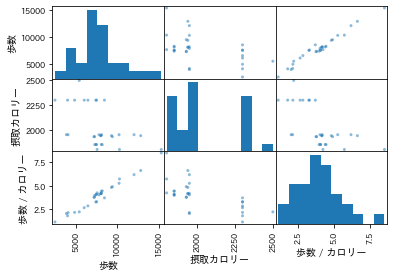

In [56]:
df = pd.read_pickle(path_df_shaped_pickle)
# ====================================
# 統計データの扱い
# ====================================
# 1. 基本統計量の算出
print('最大値:.max()', df['摂取カロリー'].max())
print('最小値:.min()', df['摂取カロリー'].min())
print('平均値:.mean()', df['摂取カロリー'].mean())
print('中央値:.median()', df['摂取カロリー'].median())
print('最頻値:.mode()', df['摂取カロリー'].mode())
print('標本標準偏差:.std(ddof=1:default)', df['摂取カロリー'].std()) # default:ddof=1
print('母集団の標準偏差(の推定値):.std(ddof=0)', df['摂取カロリー'].std(ddof=0))
print('サンプル数:.count()\n', df['摂取カロリー'].count())
# 2. 要約
print('代表的な統計量をまとめて算出:.describe()\n', df.describe())
# 3. (カラム間の)相関係数 > 各特徴量の独立性を考えたりするとき。多重共線性とか
print('カラム間の相関係数をまとめて算出:.corr()\n', df.corr())
# 4. 散布図行列
from pandas.plotting import scatter_matrix
_ = scatter_matrix(df)
# 5. データ変換
#    - MachineLearning系ライブラリではDataFrameを使うこともあれば
#    - ndarray(Numpy)を使うこともある。状況に応じでこれらの相互変換が必要である。
#    DataFrame -> ndarray : DataFrame.values
#    ndarray -> DataFrame : df = pd.DataFrame(ndarray, index=[], columns=[])
#    ** 補足: pandasはnumpyを拡張したもの
df_array = df.values
print('df.values (convert to ndarray) = ')
print(df_array)

### 4.3. scikit-learn